# working_with_time_series_exercises

### imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from vega_datasets import data



## SF temps

In [3]:
sf_temps = data.sf_temps()
sf_temps.head(10)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
5,45.8,2010-01-01 05:00:00
6,45.9,2010-01-01 06:00:00
7,45.9,2010-01-01 07:00:00
8,46.4,2010-01-01 08:00:00
9,48.0,2010-01-01 09:00:00


In [4]:
sf_temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
sf_temps.shape

(8759, 2)

In [6]:
sf_temps.isnull().sum()

temp    0
date    0
dtype: int64

In [7]:
sf_temps.describe()

,temp
count,8759.000000
mean,56.924112
std,6.107079
min,45.600000
25%,52.300000
50%,56.500000
75%,60.700000
max,72.200000


### Use the above dataset for the following exercises:

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
# make sure that the date is a a datetime data type before putting in index
# set date to index sorted by date
sf_temps = sf_temps.set_index('date').sort_index()
sf_temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [9]:
# check that index is dates
sf_temps.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=8759, freq=None)

In [35]:
# resample as daily , mean by temp if there was more in the dataframe
daily_sf_temps = sf_temps.resample('D').mean()
daily_sf_temps

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [36]:
# information of the date is still in the index
daily_sf_temps.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='date', length=365)

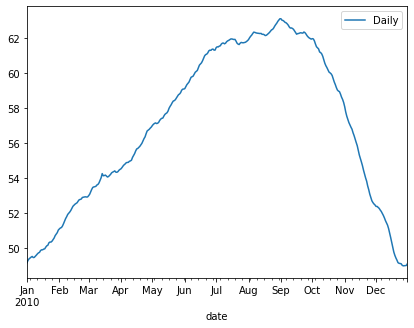

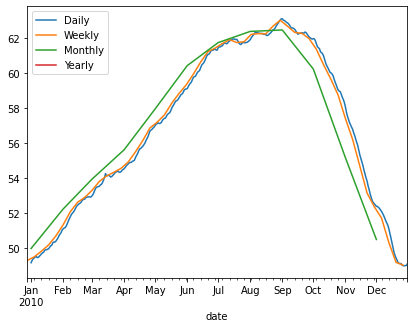

In [37]:
# visualization of resample
plt.figure(figsize=(15, 5))

plt.subplot(121)
daily_sf_temps.temp.plot(label='Daily')
plt.legend()
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(122)

daily_sf_temps.temp.plot(label='Daily')
sf_temps.resample('W').mean().temp.plot(label='Weekly')
sf_temps.resample('M').mean().temp.plot(label='Monthly')
sf_temps.resample('Y').mean().temp.plot(label='Yearly')
plt.legend()
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [13]:
# resample by day and find minimum
min_sf_temps = sf_temps.resample('D').min()
min_sf_temps

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


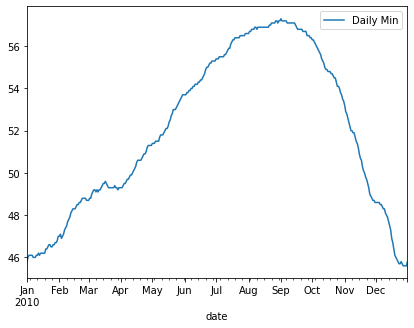

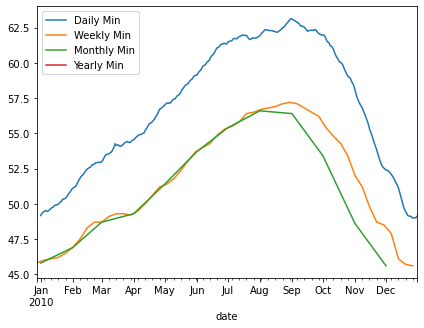

In [14]:
# show visualization of daily minimum
plt.figure(figsize=(15, 5))

plt.subplot(121)
min_sf_temps.temp.plot(label='Daily Min')
plt.legend()
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(122)

daily_sf_temps.temp.plot(label='Daily Min')
sf_temps.resample('W').min().temp.plot(label='Weekly Min')
sf_temps.resample('M').min().temp.plot(label='Monthly Min')
sf_temps.resample('Y').min().temp.plot(label='Yearly Min')
plt.legend()
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [15]:
max_sf_temps = sf_temps.resample('D').max()
max_sf_temps

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2
2010-12-29,53.2


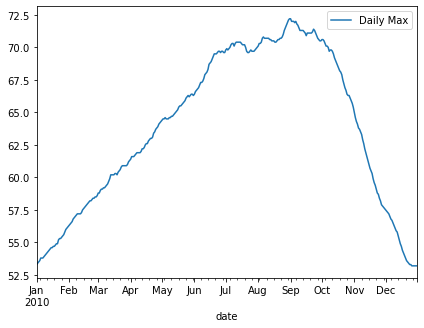

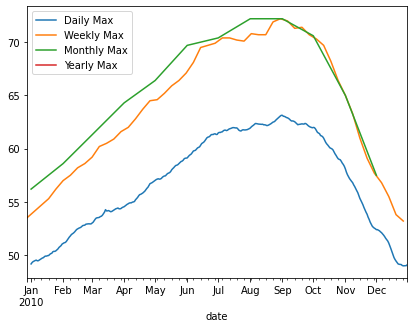

In [16]:
# show visualization of daily minimum
plt.figure(figsize=(15, 5))

plt.subplot(121)
max_sf_temps.temp.plot(label='Daily Max')
plt.legend()
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(122)

daily_sf_temps.temp.plot(label='Daily Max')
sf_temps.resample('W').max().temp.plot(label='Weekly Max ')
sf_temps.resample('M').max().temp.plot(label='Monthly Max')
sf_temps.resample('Y').max().temp.plot(label='Yearly Max')
plt.legend()
plt.show()

### 4. Which month is the coldest, on average?

In [17]:
sf_temps.resample('M').min()

,temp
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-06-30,53.7
2010-07-31,55.4
2010-08-31,56.6
2010-09-30,56.4


In [18]:
# create month name column
sf_temps['month_name']=sf_temps.index.month_name()
sf_temps

,temp,month_name
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January
...,...,...
2010-12-31 19:00:00,50.4,December
2010-12-31 20:00:00,49.9,December
2010-12-31 21:00:00,49.4,December


In [19]:
sf_temps.groupby('month_name').min()

,temp
month_name,
April,49.3
August,56.6
December,45.6
February,46.9
January,45.8
July,55.4
June,53.7
March,48.7
May,51.4


In [20]:
# find the lowest temp by month
sf_temps.groupby('month_name').min().sort_values(by='temp').head(1)

,temp
month_name,
December,45.6


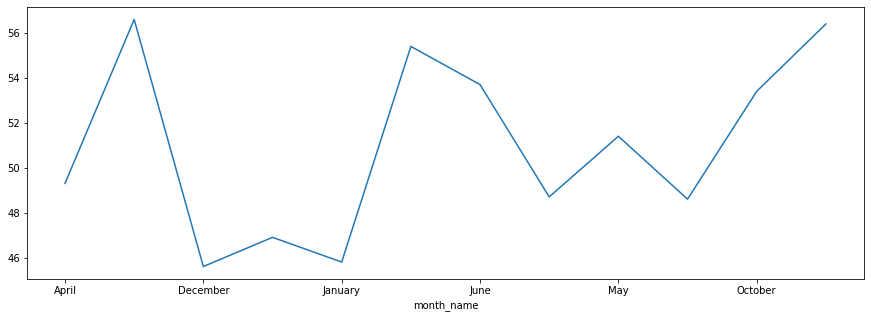

In [21]:
# vizualize month vs temp
plt.figure(figsize=(15, 5))
sf_temps.groupby('month_name').min().temp.plot();

### 5. Which month has the highest average temperature?

In [22]:
# group by month name
sf_temps.groupby('month_name').max()

,temp
month_name,
April,64.3
August,72.2
December,57.5
February,58.6
January,56.2
July,70.4
June,69.7
March,61.3
May,66.4


In [23]:
# find the max temp by month
sf_temps.groupby('month_name').max().sort_values(by='temp').head(1)

,temp
month_name,
January,56.2


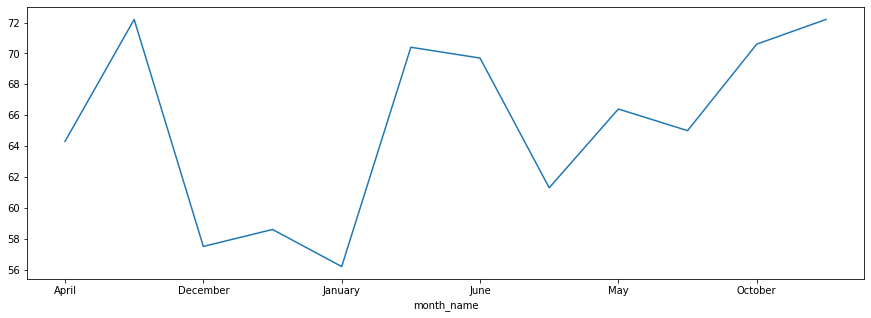

In [24]:
# vizualize month vs temp
plt.figure(figsize=(15, 5))
sf_temps.groupby('month_name').max().temp.plot();

### 4 and 5 in one line
using resample and idxmin, idxmax

In [38]:
sf_temps.resample('M').temp.mean().idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

In [39]:
sf_temps.resample('M').temp.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [25]:
# create dataframe of diffirence
diff_daily_sf_tempt = max_sf_temps - min_sf_temps
diff_daily_sf_tempt

,temp
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7
...,...
2010-12-27,7.6
2010-12-28,7.6
2010-12-29,7.6


In [26]:
# create month name column in diff_daily_sf_tempt data frame
diff_daily_sf_tempt['month_name']=daily_sf_temps.index.month_name()
diff_daily_sf_tempt

,temp,month_name
date,,
2010-01-01,7.5,January
2010-01-02,7.4,January
2010-01-03,7.4,January
2010-01-04,7.5,January
2010-01-05,7.7,January
...,...,...
2010-12-27,7.6,December
2010-12-28,7.6,December
2010-12-29,7.6,December


In [27]:
# group by month
diff_daily_sf_tempt.groupby('month_name').max().sort_values(by='temp')

,temp
month_name,
December,8.9
January,9.3
February,9.9
November,11.8
March,12.0
April,13.0
May,13.1
October,14.4
July,14.8


In [28]:
# find the month with the most temperature variability
diff_daily_sf_tempt.groupby('month_name').max().sort_values(by='temp', ascending=False).head(1)

,temp
month_name,
August,15.0


### 6 new way

In [40]:
# use aggregato min max
# create data frame
minmax_df = sf_temps.resample('D').temp.agg(['min','max'])

In [41]:
# look at dataframe
minmax_df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [44]:
# calculate the diff
minmax_df['change']=minmax_df['max']-minmax_df['min']
minmax_df

,min,max,change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [47]:
minmax_df.resample('M').change.mean().idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

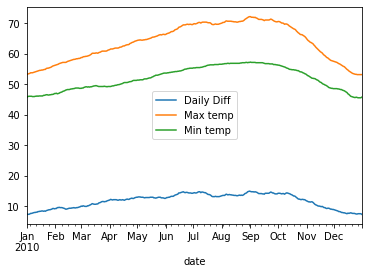

In [29]:
diff_daily_sf_tempt.temp.plot(label='Daily Diff')
max_sf_temps.temp.plot(label='Max temp')
min_sf_temps.temp.plot(label='Min temp')

plt.legend()
plt.show()

## Seattle Weather

In [75]:
data.seattle_weather.description

'This dataset contains precipitation totals, temperature extremes, wind speed, and weather type recorded daily in Seattle from 2012 to 2015. The dataset is drawn from public-domain `NOAA data <https://www.weather.gov/disclaimer>`_, and transformed using scripts available at http://github.com/vega/vega_datasets/.'

In [76]:
seattle_df = data.seattle_weather()


In [77]:
seattle_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [78]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [79]:
seattle_df.set_index('date',inplace=True)
seattle_df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


### Use the above dataset for the following exercises:

### 1. Which year and month combination has the highest amount of precipitation?

In [80]:
seattle_df.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [81]:
# show the max value
seattle_df.resample('M').precipitation.sum().max()

284.5

In [82]:
# show the max by index
seattle_df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [83]:
# nice format
seattle_df.resample('M').precipitation.sum().idxmax().strftime('%B, %Y')

'December, 2015'

### 2. Visualize the amount of monthly precipitation over time.

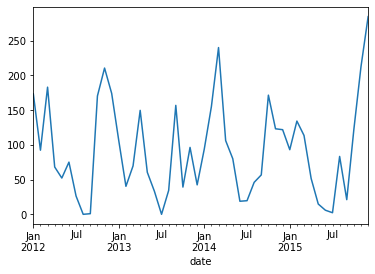

In [84]:
seattle_df.resample('M').precipitation.sum().plot();

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

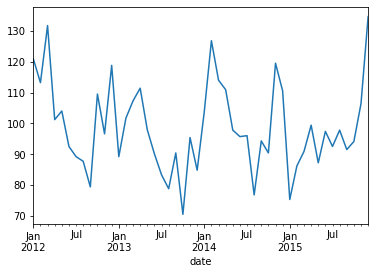

In [85]:
seattle_df.resample('M').wind.sum().plot();

### 4. Which year-month combination is the windiest?

In [86]:
seattle_df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [88]:
seattle_df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [89]:
seattle_df.resample('y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

In [93]:
seattle_df.groupby('weather').max()

,precipitation,temp_max,temp_min,wind
weather,,,,
drizzle,1.0,31.7,16.1,5.2
fog,55.9,30.6,17.8,8.8
rain,54.1,35.6,17.8,9.5
snow,23.9,11.1,5.6,7.0
sun,27.7,35.0,18.3,7.7


### 6. In which month does it rain the most?

In [101]:
rain_by_month=pd.DataFrame(seattle_df.resample('M')


SyntaxError: invalid syntax (3603494230.py, line 2)

In [99]:
seattle_df.resample('M').weather.value_counts()

date        weather
2012-01-31  rain       18
            snow        7
            sun         4
            drizzle     2
2012-02-29  rain       17
                       ..
2015-10-31  rain        1
2015-11-30  fog        21
            sun         9
2015-12-31  fog        25
            sun         6
Name: weather, Length: 138, dtype: int64

In [96]:
rain_by_month=pd.DataFrame(seattle_df.resample('M').precipitation.sum())
rain_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [98]:
seattle_df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [ ]:
rain_by_month['month']=rain

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [104]:
seattle_df['did_rain']= np.where(seattle_df['precipitation']==0,0,1)

In [105]:
seattle_df.head()

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [106]:
seattle_df.resample("M").did_rain.sum().idxmax().strftime('%B','%Y')

TypeError: strftime() takes exactly 2 positional arguments (3 given)